In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
TcS=pd.read_csv('TCS.csv')

In [4]:
TcS

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,4.16,4.26,4.14,4.22,3.944782,232500
1,2020-01-02,4.29,4.37,4.17,4.27,3.991522,142800
2,2020-01-03,4.22,4.32,4.18,4.28,4.000870,141500
3,2020-01-06,4.23,4.46,4.20,4.45,4.159782,118500
4,2020-01-07,4.44,4.45,4.31,4.39,4.103695,104500
...,...,...,...,...,...,...,...
249,2020-12-24,12.90,12.95,11.93,12.21,12.210000,886700
250,2020-12-28,12.38,12.42,10.75,10.80,10.800000,1310800
251,2020-12-29,10.96,11.00,9.72,9.87,9.870000,2109300
252,2020-12-30,9.88,10.19,9.72,9.74,9.740000,771400


# predict closing price using regression algorithm

In [5]:
X=TcS[['Date','Open', 'High','Low','Volume']]

In [6]:
y=TcS[['Date','Close']]

In [7]:
X_d=X.iloc[:,1:]
X_d.to_numpy()

array([[4.1600e+00, 4.2600e+00, 4.1400e+00, 2.3250e+05],
       [4.2900e+00, 4.3700e+00, 4.1700e+00, 1.4280e+05],
       [4.2200e+00, 4.3200e+00, 4.1800e+00, 1.4150e+05],
       ...,
       [1.0960e+01, 1.1000e+01, 9.7200e+00, 2.1093e+06],
       [9.8800e+00, 1.0190e+01, 9.7200e+00, 7.7140e+05],
       [9.8200e+00, 9.9200e+00, 9.4700e+00, 5.0092e+05]])

In [8]:
X_b = np.c_[np.ones((254, 1)), X_d]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X_b, y.iloc[:,1:], test_size = 0.3) 

In [10]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [11]:
y_predict = X_test.dot(theta_best)

In [14]:
y_p=pd.DataFrame(y_predict)


In [15]:
y_f = y.loc[y_test.index,:]

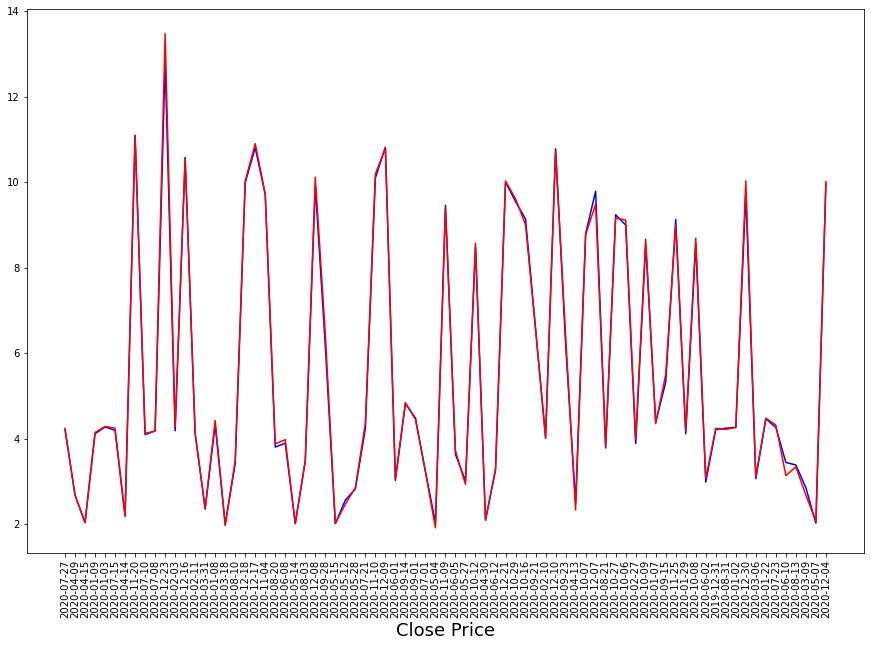

In [16]:
plt.figure(figsize=(15,10))
plt.plot(y_f.Date, y_f.Close,'b-')
plt.plot(y_f.Date, y_p, 'r-')
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price', fontsize=18)
plt.xticks(y_f.Date, rotation='vertical')
plt.show()

In [ ]:
mean_squared_error(y_test,y)

# predict closing algorithm using polynomial regression alorithm

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [22]:
X_train[0], X_poly[0]

(array([1.00e+00, 2.02e+00, 2.08e+00, 1.95e+00, 2.73e+05]),
 array([1.0000e+00, 2.0200e+00, 2.0800e+00, 1.9500e+00, 2.7300e+05,
        1.0000e+00, 2.0200e+00, 2.0800e+00, 1.9500e+00, 2.7300e+05,
        4.0804e+00, 4.2016e+00, 3.9390e+00, 5.5146e+05, 4.3264e+00,
        4.0560e+00, 5.6784e+05, 3.8025e+00, 5.3235e+05, 7.4529e+10]))

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([0.01800005]),
 array([[ 0.00000000e+00, -2.78268364e-01,  3.60228512e-01,
          4.21094026e-01, -5.53742891e-08, -9.73766692e-10,
         -2.79289452e-01,  3.60228511e-01,  4.21094028e-01,
         -5.16198642e-08, -3.51476209e-01, -2.29152448e-01,
          1.04135190e+00, -8.83368987e-08,  5.88445549e-01,
         -1.05542943e+00, -9.65756613e-08,  6.69436252e-03,
          2.12592951e-07,  8.10462808e-15]]))

In [24]:
X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)

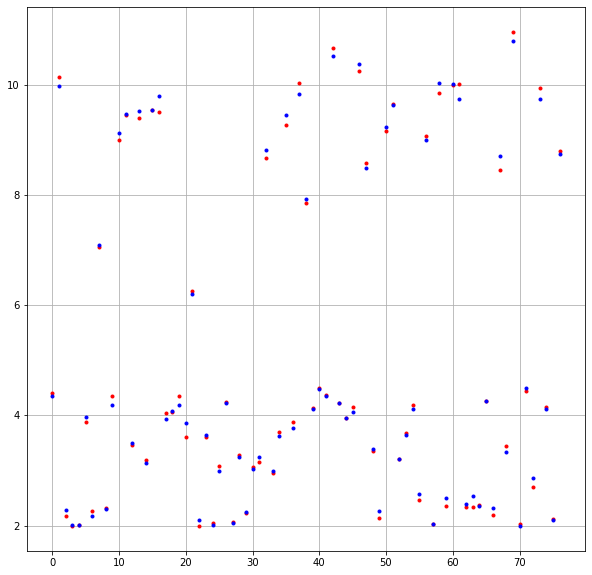

In [25]:
plt.figure(figsize=(10,10))
plt.plot(y_predict , 'r.')
plt.plot(y_test, 'b.')
plt.grid()
plt.show()